# Part I - (Ford GoBike System Data)


## Introduction
> This document explores a dataset includes information about individual rides made in Ford GoBike bike-sharing system covering the greater San Francisco Bay area. 





## Preliminary Wrangling


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [21]:
# Check basic information
df.shape

(183412, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [22]:
# Display full dataset
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_minutes
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,869.750000
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,708.683333
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,1030.900000
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,608.166667
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,26.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,8.000000
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,5.216667
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,2.350000
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,2.316667


In [6]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
df.member_birth_year.sort_values()

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
           ...  
183354       NaN
183356       NaN
183363       NaN
183371       NaN
183402       NaN
Name: member_birth_year, Length: 183412, dtype: float64

In [8]:
df.start_time.sort_values()

183411    2019-02-01 00:00:20.6360
183406    2019-02-01 00:04:40.6160
183407    2019-02-01 00:04:49.7240
183410    2019-02-01 00:05:34.3600
183408    2019-02-01 00:05:34.7440
                    ...           
6         2019-02-28 23:55:35.1040
14        2019-02-28 23:56:26.8480
11        2019-02-28 23:56:55.5400
10        2019-02-28 23:57:57.2110
15        2019-02-28 23:59:18.5480
Name: start_time, Length: 183412, dtype: object

In [23]:
# Fix data issues
df[['start_station_id','end_station_id']]=df[['start_station_id','end_station_id']].astype(str)

In [24]:
# Recheck the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183412 non-null  object 
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183412 non-null  object 
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

### What is the structure of your dataset?

> There are 183412 records in this dataset within a month (Feb, 2019),  this dataset has 16 features (duration_sec, start_time, end_time, start_station_id, etc.,), most of the varible are focus on the bike trip information, like duration time, start and end staion's location, other about the user's infomation, like their birth year and gender. Each row is a record about a single ride.

### What is/are the main feature(s) of interest in your dataset?

> I'm interseted in the difference between customer and subscriber ( user_type).

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Because there are other features related to member's information that I can investigate, like member's gender, member's birth year, duration_sec, I think these features can help me investigate more.


## Univariate Exploration

> In this part, I'll expore single variable, to have a deep understanding of each variable.


Duration time is an important feature for a bike sharing company, so I'll start with duration_sec variable, to know the distribution of duration time. Since duration_sec variable has wide range, so I'll change the duration_sec column from seconds to minutes, then plot it.

In [25]:
# Transform duration time from second to minute
df['duration_minutes']=df['duration_sec']/60

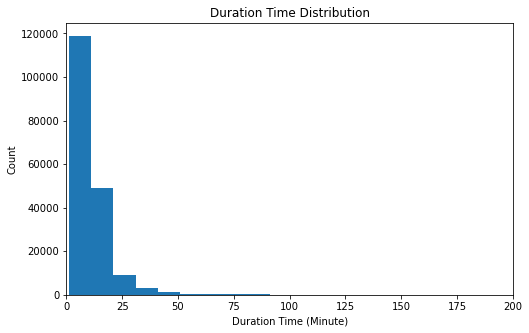

In [26]:
# Start with regular hist plot
binsize = 10
bins = np.arange(1, df['duration_minutes'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.xlabel('Duration Time (Minute)')
plt.ylabel('Count')
plt.title('Duration Time Distribution')
plt.xlim([0,200])
plt.show()

There is a long tail and not easyliy to see the distribution, I'll set limit on X axis to get more clear observation. From the figure above, we can see that the main time distribution is between 0 and 50, so I'll set xlim samll than 50 minutes.

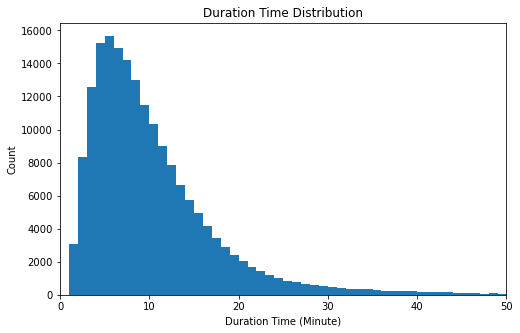

In [27]:
# Reset binsize and xlim
binsize = 1
bins = np.arange(1, df['duration_minutes'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_minutes', bins = bins)
plt.xlabel('Duration Time (Minute)')
plt.ylabel('Count')
plt.title('Duration Time Distribution')
plt.xlim([0,50])
plt.show()

After adjustment, the distribution of duration time is more clear, As we can see from the hist plot above, even though there are some very large duration time records, most of the duration time are less than 20 minutes, using time larger than 50 minutes are very rare. 
 

Next I'll explore the popular station, to know which station that our member love most. Since there are hundreds of station, I'll only plot top 10 popular station to know which station have more users. First I'll plot top 10 start sation.

In [28]:
# Define a function to reduce repeat code
def x_y_t (xL,yL,title):
    plt.title(title)
    plt.xlabel(xL)
    plt.ylabel(yL)
color=sb.color_palette()[0]

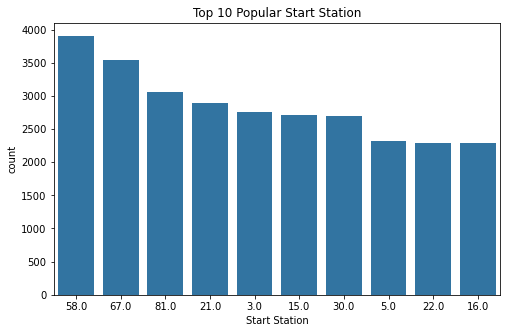

In [19]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'start_station_id', color = color,order = df['start_station_id'].value_counts().iloc[:10].index)
xL='Start Station'
yL='count'
title='Top 10 Popular Start Station'

# Recall the defined function

x_y_t (xL,yL,title)
plt.show()

From the bar chart above, staion 58, 67 and 81 have more users started than other station. Let's expore end staion.

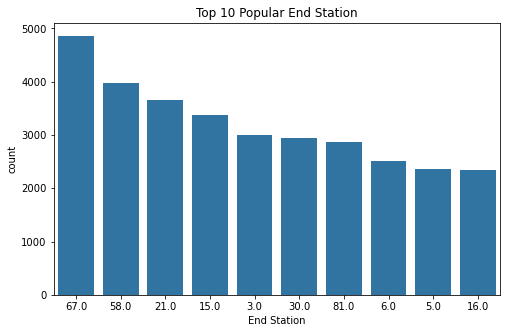

In [20]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'end_station_id', color = color,order = df['end_station_id'].value_counts().iloc[:10].index)
xL='End Station'
yL='count'
title='Top 10 Popular End Station'

# Recall the defined function

x_y_t (xL,yL,title)
plt.show()

As we can see from the chart, 67, 58 and 21 get more users return bike than other station. Let's put popular start staion and end staion bar chart together to have a better observation. I'll use subplot.

Text(0.5, 0, 'End Station')

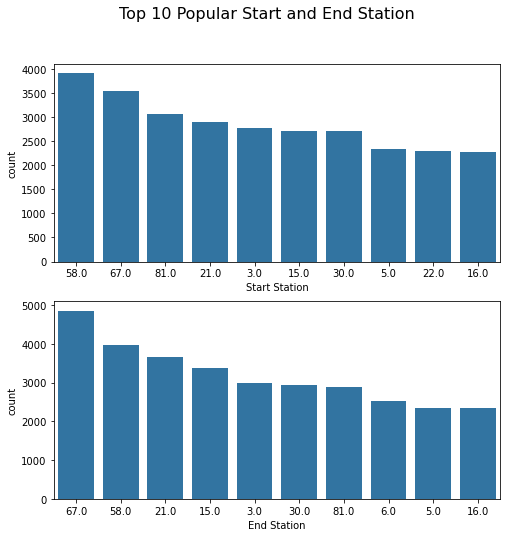

In [27]:
# Make a subplot to compare popular start and end station
fig, ax = plt.subplots(nrows=2, figsize = [8,8])
default_color = sb.color_palette()[0]
plt.subplot(2, 1, 1) 
sb.countplot(data = df, x = 'start_station_id', color = default_color,order = df['start_station_id'].value_counts().iloc[:10].index)
plt.xlabel('Start Station')
fig.suptitle('Top 10 Popular Start and End Station ', fontsize=16)

plt.subplot(2, 1, 2) 
sb.countplot(data = df, x = 'end_station_id', color = default_color,order = df['end_station_id'].value_counts().iloc[:10].index)
plt.xlabel('End Station')

As we can see from the subplot, eventhough the order on each plot is different, the popular station are almost same, station 58 and 67 have more users than other station. 

Next I'll explore another important variable, user type. Since there are only two types of users, so I'll use a pie plot, and display the ratio of each group.

Text(0.5, 1.0, 'The Ratio of Subscriber and Customer ')

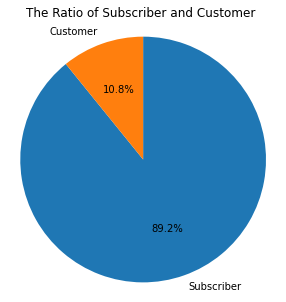

In [29]:
plt.figure(figsize=[5, 5])
sorted_counts = df['user_type'].value_counts()

# Make a pie chart and display ratio of each group

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%');
plt.axis('square')
plt.title('The Ratio of Subscriber and Customer ')

As we can see from the chart above, the ratio difference between the two user types is huge. Subscriber is the majority group of our users, which is 89.2%. Only 10.8% users are customer.

Member_birth_year is another charater of our members, so is very important to know what are the main birth year of our members. I'll make a hist plot of member birth year, to see the birth year distribution of our members

(array([1.0000e+00, 7.0000e+01, 1.0000e+00, 4.0000e+00, 1.2700e+02,
        8.2900e+02, 8.0460e+03, 2.2273e+04, 6.9441e+04, 7.4355e+04]),
 array([1878. , 1890.3, 1902.6, 1914.9, 1927.2, 1939.5, 1951.8, 1964.1,
        1976.4, 1988.7, 2001. ]),
 <BarContainer object of 10 artists>)

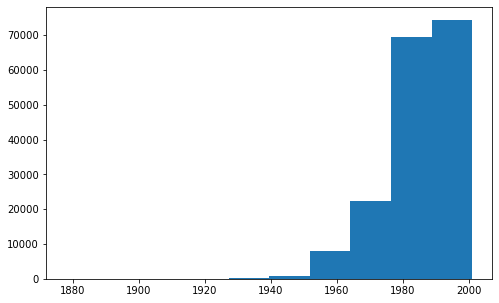

In [31]:
# Start with regular hist plot

plt.figure(figsize=[8, 5])
plt.hist(data=df,x='member_birth_year',color = default_color,bins=10)

Since there are some outliers, the shape of this distribution is right skewed, I should do some adjustment. The main distribution of member birth year is larger than 1940, so I'll reset the binsize and limit on X axis to have a better observation.

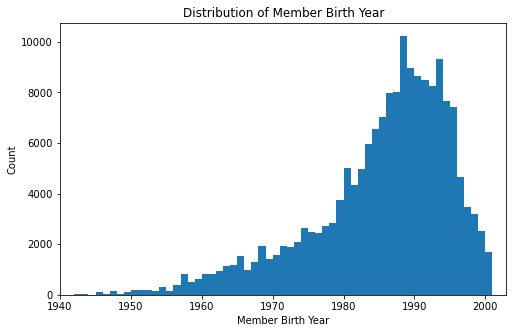

In [32]:
# Reset binsize and xlim
binsize = 1
bins = np.arange(1878, df['member_birth_year'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'member_birth_year', bins = bins)
plt.xlabel('Member Birth Year')
plt.ylabel('Count')
plt.xlim([1940,2003])
plt.title('Distribution of Member Birth Year')
plt.show()

After adjustment, the hist plot tells more. From the hist plot above, we could know that people born between 1980 and 2001 are the main part of our members. People born around 1990 are more likely to be our members. Very few members were born before 1950.

Another character that we can investigate of our members is gender. Since there are only three unique values of member_gender variable, I'll still use pie plot to investigate it and display ratio of each group.

Text(0.5, 1.0, 'The Ratio of Member Gender')

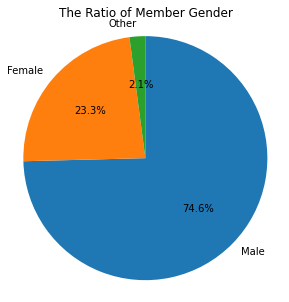

In [34]:
plt.figure(figsize=[5, 5])

# Display with sorted value counts

sorted_counts = df['member_gender'].value_counts()

# Make a pie chart and display ratio of each group

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%');
plt.axis('square')
plt.title('The Ratio of Member Gender')

From the above plot, we could know that the ratio difference bewteen each gender is huge. Most of our members are male, which the ratio is 74.6%. 23.3% of our members are famale, 2/3 less than male.

The last varible I'll explore in this part is bike_share_for_all_trip, there are two types of values, so I'll use pie plot again, also display the ratio of each group.

Text(0.5, 1.0, 'The Ratio of Bike Share For All Trip')

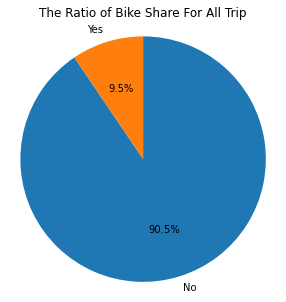

In [36]:
plt.figure(figsize=[5, 5])
sorted_counts = df['bike_share_for_all_trip'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,autopct='%1.1f%%');
plt.axis('square')
plt.title('The Ratio of Bike Share For All Trip')

As we can see from the above pie chart, only a few users use bike share for all trip, which is under 10%, 90.5% of users are not use bike share for all trip. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration_sec variabel is a wide range variabel, second is also not very straightfoward to our audience, so I add a column duration_minutes, change duration time from second to minute, to make it more understandable to our audience. After the transformation, I found there still a long tail of the hist plot, so I set limit on X axis from 0 to 50, to have a more clear look of bike using time.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the member_birth_year variable, there are many incorrect value like '1878','1900', these values are unreasonbel and also lead to a very long tail of the hist plot, so I set limit on X axis from 1940 to 2003, so that we could know the main birth year of our members.

## Bivariate Exploration

> In this section, I’ll investigate relationships between pairs of variables in sharing bike using data.

Since I'm very interested in the difference of subscriber and customer, I'll explore the relationship about user_type and duration_sec at first, to see if user type have effect on duration time.

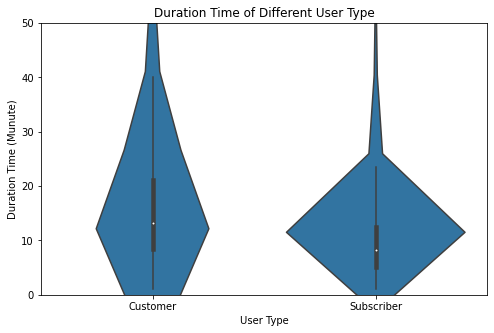

In [38]:
# Make a violin plot to compare each group
plt.figure(figsize=[8, 5])
sb.violinplot(data=df, x='user_type', y='duration_minutes',color=default_color)
plt.xlabel('User Type')
plt.ylabel('Duration Time (Munute)')
plt.title('Duration Time of Different User Type')
plt.ylim([0,50])
plt.show()

From this violin plot, We could know that customer are more likely to have longer duration time, while the most duration time of subscriber group is less than 30 minutes. 

What's the relationship of duration time and member birth year? Let's explore it. Since all of these two variables are quantative, so I'll use scatter plot to find the relationship.

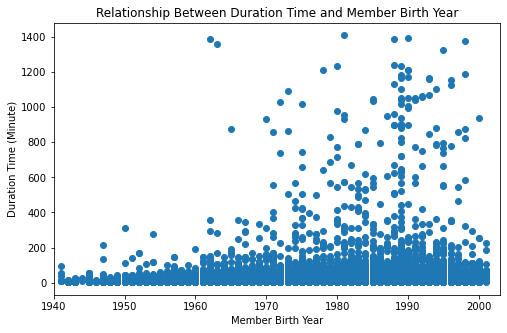

In [58]:
# Make a regular scatter plot at first
plt.figure(figsize=[8, 5])
plt.scatter(data=df, x='member_birth_year', y='duration_minutes')
plt.xlim([1940,2003])
plt.xlabel('Member Birth Year')
plt.ylabel('Duration Time (Minute)')
plt.title('Relationship Between Duration Time and Member Birth Year')
plt.show()

There are so many overlaping plot, so I'll change the alpha value and set ylim to have a better look

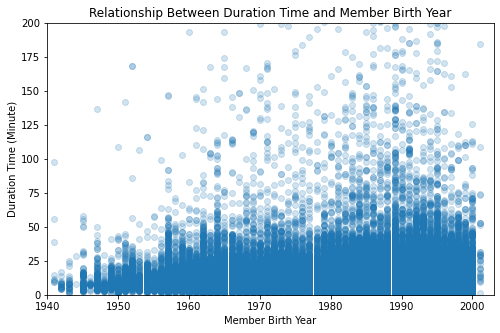

In [40]:
plt.figure(figsize=[8, 5])

# Reset alpha value to reduce overlapping

plt.scatter(data=df, x='member_birth_year', y='duration_minutes', alpha=0.2)
plt.xlim([1940,2003])
plt.ylim([0,200])
plt.xlabel('Member Birth Year')
plt.ylabel('Duration Time (Minute)')
plt.title('Relationship Between Duration Time and Member Birth Year')
plt.show()

After the adjustment, from the scatter plot above, we could know that the younger the members are, they more liekly to have a longer duration time. 

Next I'll explore the relationship between duration time and member's gender.  since we know most of our members duration time is less than 30 minutes, so I'll set duration time limit from 0 to 30. Let's make a box plot.

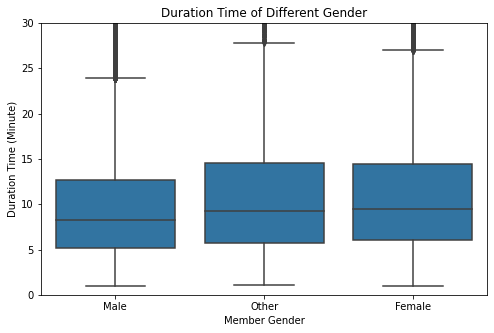

In [42]:
plt.figure(figsize=[8, 5])
sb.boxplot(data=df, x='member_gender', y='duration_minutes', color=default_color)
plt.ylim([0,30])
plt.xlabel('Member Gender')
plt.ylabel('Duration Time (Minute)')
plt.title('Duration Time of Different Gender')
plt.show()

Female member's average duration time are longer than male, also the other gender group. Even though there is a duration time difference betwwen each gender, is still not a big gap.

Next, let's explore the member gender group by user type.

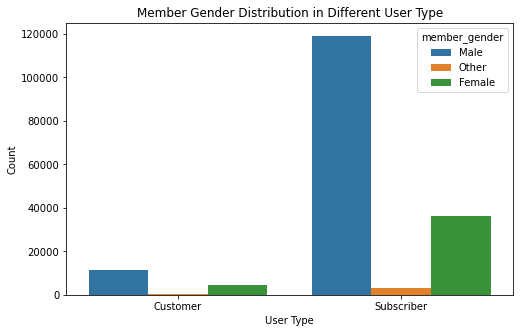

In [44]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'user_type', hue = 'member_gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Member Gender Distribution in Different User Type')
plt.show()

As we can see from the plot above, male are the majority in both subscriber and customer group, next is female, then the others. 

Next, let explore the member birth year distribution of each user type.

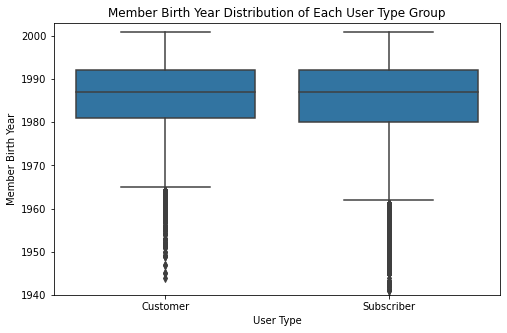

In [45]:
plt.figure(figsize=[8, 5])
sb.boxplot(data=df, x='user_type', y='member_birth_year', color=default_color)
plt.ylim([1940,2003])
plt.xlabel('User Type')
plt.ylabel('Member Birth Year')
plt.title('Member Birth Year Distribution of Each User Type Group')
plt.show()

As we can see from the above box plot, even though they are different types of users, the birth year distribution of these two groups are almost the same. Most of users are born around 1990.

The last plot of this part is bike_share_for_all_trip distribution in each user type.

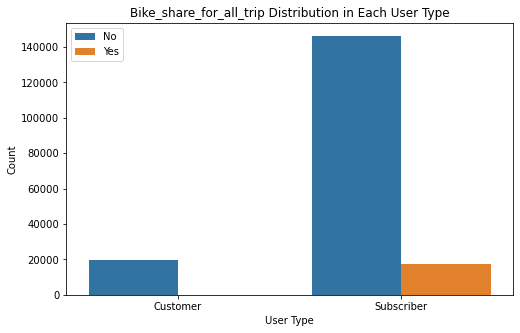

In [46]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df, x = 'user_type', hue = 'bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.title('Bike_share_for_all_trip Distribution in Each User Type')
plt.legend(loc='upper left')
plt.show()

As we can see from the plot above, Subscriber are more likely to use share bike for all trips, while customers are not.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Customers are more likely to have longer duration time, which is interesting. Because I was expected subscribers will have longer duration time. 


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Female members duration time is longer than male members.

## Multivariate Exploration

>In this part, I'll explore the replationship between three varibles.

I have already explore the relationship between duration time and user type, also duration time and member gender, let's explore them together. I'll make a subplot to get the observation.

Text(0.5, 0.98, 'Duration Time Distribution of Each User Type Groupby Member Gender')

<Figure size 720x720 with 0 Axes>

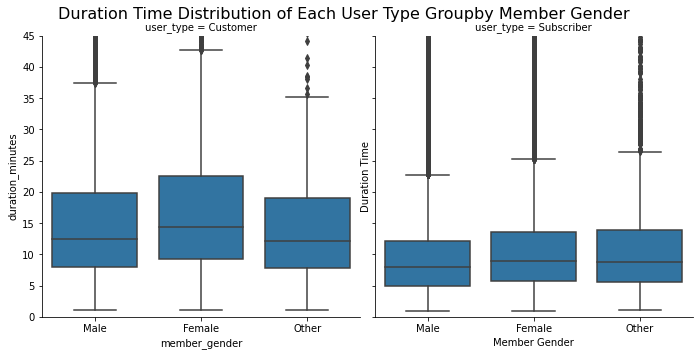

In [55]:
plt.figure(figsize=[10, 10])
g = sb.FacetGrid(data = df, col = 'user_type', height = 5)

# Set order to easily compare

g.map(sb.boxplot, 'member_gender', 'duration_minutes', order=["Male", "Female",'Other'])
plt.ylim([0,45])
plt.xlabel('Member Gender')
plt.ylabel('Duration Time')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Duration Time Distribution of Each User Type Groupby Member Gender',fontsize=16)

In customer group, women have the longest average duration time, followed by male and other gender. In subscriber group, female still have the longest average duration time, followed by other gender and male. This trends align with the relationship between duration time and user type. Average duration time, customer are longer than subscriber.

In the last plot. I'll explore the relationship between user type, member birth year and member gender, to see the distribution of member birth year grouped by user type and member gender.

<Figure size 720x720 with 0 Axes>

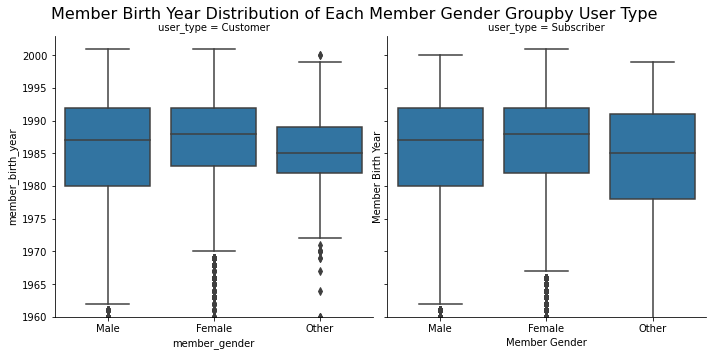

In [56]:
plt.figure(figsize=[10, 10])
g = sb.FacetGrid(data = df, col = 'user_type', height = 5)

# Set order to easily compare these two group

g.map(sb.boxplot, 'member_gender', 'member_birth_year', order=["Male", "Female",'Other'])
plt.ylim([1960,2003])
plt.xlabel('Member Gender')
plt.ylabel('Member Birth Year')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Member Birth Year Distribution of Each Member Gender Groupby User Type ',fontsize=16)
plt.show()

In the customer group, female users average age are younger than male users, other gender users average age are older than female and male users. In subscriber group, the trend is the same as the customer group. Member average birth year are focused between 1985 and 1990.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the first plot ( Duration Time Distribution of Each User Type Groupby Member Gender ), there is a small duration time difference between customer and subscriber group in each gender. This trend align with the observation before, which is the customer have a longer average using time than subscriber.

### Were there any interesting or surprising interactions between features?

> In the second plot, we investigate the relationship between member birth year, member gender and user type. I found that the average age of female is younger than male, which is interresting.

## Conclusions
This is the exploratory process of bike sharing use record dataset. In this process, I did univariate exploration, bivariate exploration, multivariate exploration of each variable. After these exploration, I have got a lot of great observation from it. 
- 1, Most of the duration time are less than 20 minutes
- 2, Station 58 and 67 have more users than other station.
- 3, People born between 1980 and 2001 are the main part of our members
- 4, Customer are more likely to have longer duration time
- 5, Younger members are more liekly to have a longer duration time. 